## Batsman Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

1. Read data from the file

In [ ]:
df1 = pd.read_csv('Btsmn_wk_New_features_avg.csv')
df1

,Unnamed: 0,wicket_keeper_batsman,match_id,home_team,opposition_team,venue,inning,batsman_runs,sixes,fours,half_century,century,zeros,balls,strike_rate,rating,catch,Direct_runout,Indirect_runout,Stumping,thirty_run_bonus,half_cen_points,cent_points,zero_points,batting_run_points,batting_strike_points,total_batting_points,fp_points,total_points,avg_oppo_points,avg_venue_points,avg_inning_points,avg_batsman_runs,avg_strike_rate,avg_home_team_points,bound_runs,avg_bound_runs,avg_total_points,avg_balls
0,0,A Chopra,29,Kolkata Knight Riders,Royal Challengers Bangalore,Eden Gardens,1,2,0,0,0,0,0,5,40.000000,8.0,0,0,0,0,0,0,0,0,2,0,2,0,2,2.000000,2.000000,2.000000,2.000000,40.000000,2.000000,0,0.000000,2.000000,5.000000
1,1,A Chopra,32,Kolkata Knight Riders,Deccan Chargers,"Rajiv Gandhi International Stadium, Uppal",1,24,0,3,0,0,0,25,96.000000,8.5,0,0,0,0,0,0,0,0,15,0,15,0,15,15.000000,15.000000,8.500000,13.000000,68.000000,8.500000,12,6.000000,8.500000,15.000000
2,2,A Chopra,35,Kolkata Knight Riders,Delhi Daredevils,Eden Gardens,1,13,0,2,0,0,0,18,72.222222,8.5,0,0,0,0,0,0,0,0,7,0,7,0,7,7.000000,4.500000,8.000000,13.000000,69.407407,8.000000,8,6.666667,8.000000,16.000000
3,3,A Chopra,38,Kolkata Knight Riders,Mumbai Indians,Wankhede Stadium,1,1,0,0,0,0,0,4,25.000000,8.0,0,0,0,0,0,0,0,0,1,0,1,0,1,1.000000,1.000000,6.250000,10.000000,58.305556,6.250000,0,5.000000,6.250000,13.000000
4,4,A Chopra,51,Kolkata Knight Riders,Kings XI Punjab,Eden Gardens,2,2,0,0,0,0,0,3,66.666667,8.5,0,0,0,0,0,0,0,0,2,0,2,0,2,2.000000,3.666667,2.000000,8.400000,59.977778,5.400000,0,4.000000,5.400000,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6571,6571,Yuvraj Singh,677,Kings XI Punjab,Royal Challengers Bangalore,M.Chinnaswamy Stadium,1,4,0,1,0,0,0,4,100.000000,8.5,0,0,0,0,0,0,0,0,1,0,1,0,1,19.000000,10.500000,16.666667,22.139344,111.455834,14.750000,4,14.245902,15.803279,17.680328
6572,6572,Yuvraj Singh,681,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association IS Bindra Stadium, ...",1,20,1,2,0,0,0,13,153.846154,9.0,0,0,0,0,0,0,0,0,11,4,15,0,15,16.812500,14.000000,16.640625,22.121951,111.800471,14.755556,14,14.243902,15.796748,17.642276
6573,6573,Yuvraj Singh,691,Kings XI Punjab,Delhi Daredevils,Feroz Shah Kotla,1,14,0,1,0,0,0,17,82.352941,8.5,0,0,0,0,0,0,0,0,11,0,11,0,11,19.117647,14.700000,16.553846,22.056452,111.562990,14.673913,4,14.161290,15.758065,17.637097
6574,6574,Yuvraj Singh,703,Kings XI Punjab,Mumbai Indians,Holkar Cricket Stadium,1,14,1,0,0,0,0,14,100.000000,8.5,0,0,0,0,0,0,0,0,11,0,11,0,11,10.333333,11.000000,16.469697,21.992000,111.470487,14.595745,6,14.096000,15.720000,17.608000


2. Encoding categorical variables

In [ ]:
df=df1

# Opposition team 
df["opposition_team"]= df["opposition_team"].astype("category")
df["opposition_team_code"] = df["opposition_team"].cat.codes

# Venue
df["venue"]= df["venue"].astype("category")
df["venue_code"] = df["venue"].cat.codes

# Batsman name
df["wicket_keeper_batsman"]= df["wicket_keeper_batsman"].astype("category")
df["batsman_code"] = df["wicket_keeper_batsman"].cat.codes

# Drop unnecessary columns
df_ready = df.drop(columns=["venue","opposition_team","wicket_keeper_batsman","home_team"])
df_ready

,Unnamed: 0,match_id,inning,batsman_runs,sixes,fours,half_century,century,zeros,balls,strike_rate,rating,catch,Direct_runout,Indirect_runout,Stumping,thirty_run_bonus,half_cen_points,cent_points,zero_points,batting_run_points,batting_strike_points,total_batting_points,fp_points,total_points,avg_oppo_points,avg_venue_points,avg_inning_points,avg_batsman_runs,avg_strike_rate,avg_home_team_points,bound_runs,avg_bound_runs,avg_total_points,avg_balls,opposition_team_code,venue_code,batsman_code
0,0,29,1,2,0,0,0,0,0,5,40.000000,8.0,0,0,0,0,0,0,0,0,2,0,2,0,2,2.000000,2.000000,2.000000,2.000000,40.000000,2.000000,0,0.000000,2.000000,5.000000,13,7,0
1,1,32,1,24,0,3,0,0,0,25,96.000000,8.5,0,0,0,0,0,0,0,0,15,0,15,0,15,15.000000,15.000000,8.500000,13.000000,68.000000,8.500000,12,6.000000,8.500000,15.000000,1,24,0
2,2,35,1,13,0,2,0,0,0,18,72.222222,8.5,0,0,0,0,0,0,0,0,7,0,7,0,7,7.000000,4.500000,8.000000,13.000000,69.407407,8.000000,8,6.666667,8.000000,16.000000,3,7,0
3,3,38,1,1,0,0,0,0,0,4,25.000000,8.0,0,0,0,0,0,0,0,0,1,0,1,0,1,1.000000,1.000000,6.250000,10.000000,58.305556,6.250000,0,5.000000,6.250000,13.000000,8,35,0
4,4,51,2,2,0,0,0,0,0,3,66.666667,8.5,0,0,0,0,0,0,0,0,2,0,2,0,2,2.000000,3.666667,2.000000,8.400000,59.977778,5.400000,0,4.000000,5.400000,11.000000,5,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6571,6571,677,1,4,0,1,0,0,0,4,100.000000,8.5,0,0,0,0,0,0,0,0,1,0,1,0,1,19.000000,10.500000,16.666667,22.139344,111.455834,14.750000,4,14.245902,15.803279,17.680328,13,15,205
6572,6572,681,1,20,1,2,0,0,0,13,153.846154,9.0,0,0,0,0,0,0,0,0,11,4,15,0,15,16.812500,14.000000,16.640625,22.121951,111.800471,14.755556,14,14.243902,15.796748,17.642276,0,22,205
6573,6573,691,1,14,0,1,0,0,0,17,82.352941,8.5,0,0,0,0,0,0,0,0,11,0,11,0,11,19.117647,14.700000,16.553846,22.056452,111.562990,14.673913,4,14.161290,15.758065,17.637097,3,8,205
6574,6574,703,1,14,1,0,0,0,0,14,100.000000,8.5,0,0,0,0,0,0,0,0,11,0,11,0,11,10.333333,11.000000,16.469697,21.992000,111.470487,14.595745,6,14.096000,15.720000,17.608000,8,11,205


3. Select relevant features from data

In [ ]:
# Features related to batsman's past performances
df2 = df1[['avg_inning_points','avg_venue_points','avg_oppo_points','avg_batsman_runs','avg_strike_rate','avg_home_team_points','avg_total_points','avg_bound_runs','batsman_code','opposition_team_code','venue_code','inning']]
df2

,avg_venue_points,avg_oppo_points,batsman_code
0,2.000000,2.000000,0
1,15.000000,15.000000,0
2,4.500000,7.000000,0
3,1.000000,1.000000,0
4,3.666667,2.000000,0
...,...,...,...
6571,10.500000,19.000000,205
6572,14.000000,16.812500,205
6573,14.700000,19.117647,205
6574,11.000000,10.333333,205


4. Normalization of features

In [ ]:
# Forming array of features
X = df2.values

# Sklearn library for normalization
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-1.24110297, -1.40418191, -1.82031929],
       [-0.20090844, -0.20708773, -1.82031929],
       [-1.04106556, -0.94376107, -1.82031929],
       ...,
       [-0.22491293,  0.17208237,  1.66617273],
       [-0.5209683 , -0.63681385,  1.66617273],
       [-0.5129668 , -0.68204817,  1.66617273]])

5. Retrieving labels

In [ ]:
y = df1['total_points'].values
y

array([ 2, 15,  7, ..., 11, 11,  1])

6. Split data in train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5260, 3) (5260,)
Test set: (1316, 3) (1316,)


7. Model initialization, training and testing

In [ ]:
# Regressor model with 500 trees initially
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)

# Model training
model_rf.fit(X_train, y_train) 

# Train accuracy 
pred_train_rf= model_rf.predict(X_train)
print('Training Accuracy:')
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

print()

# Test accuracy
pred_test_rf = model_rf.predict(X_test)
print('Test Accuracy:')
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

Training Accuracy:
4.474363439492434
0.9364766075338291

Test Accuracy:
11.771272000456591
0.5015751395712837


Calculation of importance of each feature

Feature: 0, Score: 0.04028
Feature: 1, Score: 0.55795
Feature: 2, Score: 0.14355
Feature: 3, Score: 0.03088
Feature: 4, Score: 0.03623
Feature: 5, Score: 0.04009
Feature: 6, Score: 0.04189
Feature: 7, Score: 0.03147
Feature: 8, Score: 0.02520
Feature: 9, Score: 0.02338
Feature: 10, Score: 0.02426
Feature: 11, Score: 0.00482


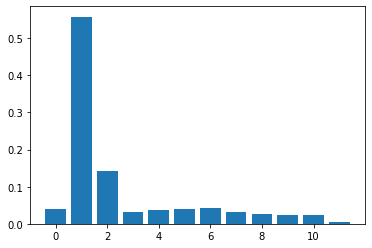

In [ ]:
importance = model_rf.feature_importances_

fn_df = pd.DataFrame({'Features':pd.DataFrame(X).columns})

# List of all the features
lst=['wicket_avg','maiden_avg','eco_avg','innings_avg','venue_avg','opp_avg','fp_avg','overs_avg','bowler_code','batting_team_code','venue_code','inning']

# Calculate importance of each feature
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# Plot for each feature
plt.bar([x for x in range(len(importance))], importance)
plt.show()

K-fold cross validation

In [ ]:
# k=5 folds
scores = cross_val_score(model_rf, X, y, cv=5)
print(scores)

[0.58436852 0.63756301 0.59937022 0.48375373 0.56582266]


# Hyper Parameter Tuning

In [ ]:
from pprint import pprint

# Current parameters of the model
print('Parameters currently in use:\n')
pprint(model_rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Grid Search on hyper parameters
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Finding best parameters 
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.4min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 22.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=500,
                              

In [ ]:
# Best parameters
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
# Train accuracy for the model with best parameters
pred_train_rf= rf_random.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

# Test accuracy for the model with best parameters
pred_test_rf = rf_random.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

8.55065198824652
0.770582634294132
11.558544887089848
0.5966989195179294
